# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

In [2]:
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

In [97]:
from sklearn.preprocessing import StandardScaler

## Step 1: Read in Data

In [3]:
df = pd.read_csv('kc_house_data_train.csv',index_col = 0)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [99]:
df.drop(columns=['date'],inplace = True)

In [100]:
df_features.dtypes

sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [101]:
df.isnull().sum()

Unnamed: 0       0
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Looking for outliers and bad data

**NOTE:**

- When talking about the limitations of the model I can mention that there were three homes with more than 10000 feet for sqft living, this may impact the model but also leaving these values out of the model would impact my ability to predict the values of larger homes

In [50]:
df[df['sqft_living']>=10000]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3275,3275,1225069038,20140505T000000,2280000.0,7,8,13540,307752,3.0,0,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
6903,6903,9808700762,20140611T000000,7062500.0,5,4.5,10040,37325,2.0,1,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
10366,10366,6762700020,20141013T000000,7700000.0,6,8,12050,27600,2.5,0,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


### Data Cleaning for Bedroom Variable - # df[df['bedrooms'] == 0]
df[df['bedrooms'] == 0]
**EDIT**
- I replaced some extreme values include 0,11,33 with the median value of the bedroom column
- There were two homes that were coded to have 0 bedrooms, but the prices of the homes were above a million dollars. I googled the home ID's and gave them the correct bedroom values. 
- Three homes that were listed to have 0 bedrooms could have possibly been studios given the sqaurefootage of the property so I chose to keep those values.

In [102]:
df['bedrooms'].replace(to_replace=[0,11,33],value=['Nan',4,3],inplace=True)

In [103]:
df['bedrooms'] = np.where(df['id'] == 6306400140, 5, df['bedrooms'])

In [104]:
df['bedrooms'] = np.where(df['id'] == 2954400190, 4, df['bedrooms'])

In [105]:
df.dropna(subset=['bedrooms'],inplace=True)

### Data Cleaning for Bathrooms

**EDIT**
- I replaced zero values with the median value of bathrooms within that price range of the home
- 

In [106]:
df['bathrooms'].replace(to_replace=[0],value=['Nan'],inplace=True)

In [107]:
df['bathrooms'] = np.where(df['id'] == 6306400140, 4.5, df['bathrooms'])

In [108]:
df['bathrooms'] = np.where(df['id'] == 2954400190, 4.5, df['bathrooms'])

In [109]:
df.dropna(subset=['bathrooms'],inplace=True)

In [ ]:
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,15))

# for i in range(1,13):
#     row = (i-1)//4
#     col = i%4-1
#     ax = axes[row][col]
#     y_new = [xi*i for xi in x]
#     ax.plot(x, y_new)
#     ax.set_title('{}*x'.format(i))

# Feature Engineering 

## Creating a years old variable

### Getting the natural log of price

In [110]:
x

In [111]:
df

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653
1,1,7974200820,865000.0,5,3,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485
2,2,7701450110,1038000.0,4,2.5,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806
3,3,9522300010,1490000.0,3,3.5,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287
4,4,9510861140,711000.0,3,2.5,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,750000.0,5,2.5,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,13.527828
17286,17286,8819900270,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,12.994530
17287,17287,3816300095,310000.0,3,1,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,12.644328
17288,17288,122069107,427500.0,3,1.5,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,12.965710


### Location

### Distance between property and Seattle

In [12]:
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

In [13]:
df['dist_seattle'] = haversine(47.6062,-122.3321, df['lat'].values, df['long'].values)

In [14]:
df['dist_seattle']

0        14.028259
1         5.449467
2         9.892434
3         8.064683
4        12.282565
           ...    
17285    10.352242
17286     4.781861
17287    11.347658
17288    20.508952
17289     9.030918
Name: dist_seattle, Length: 17290, dtype: float64

In [15]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,dist_seattle
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,...,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,14.028259
1,1,7974200820,20140821T000000,865000.0,5,3,2900,6730,1.0,0,...,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,5.449467
2,2,7701450110,20140815T000000,1038000.0,4,2.5,3770,10893,2.0,0,...,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,9.892434
3,3,9522300010,20150331T000000,1490000.0,3,3.5,4560,14608,2.0,0,...,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,8.064683
4,4,9510861140,20140714T000000,711000.0,3,2.5,2550,5376,2.0,0,...,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,12.282565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.5,3240,9960,1.0,0,...,1220,1958,0,98008,47.5858,-122.112,2730,10400,13.527828,10.352242
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,...,0,1948,0,98105,47.6687,-122.288,1350,4013,12.994530,4.781861
17287,17287,3816300095,20140514T000000,310000.0,3,1,1050,9876,1.0,0,...,0,1953,0,98028,47.7635,-122.262,1760,9403,12.644328,11.347658
17288,17288,122069107,20141204T000000,427500.0,3,1.5,1900,43186,1.5,0,...,600,1971,0,98038,47.4199,-121.990,2080,108028,12.965710,20.508952


## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

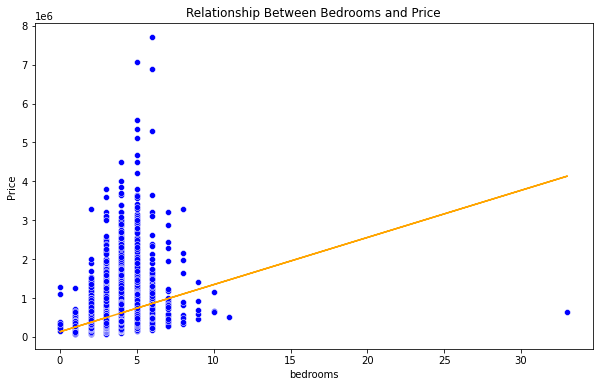

In [17]:
plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x="bedrooms", y="price", data=df, color = 'blue')

ax.set(xlabel="bedrooms", ylabel = "Price", title="Relationship Between Bedrooms and Price")


x=df["bedrooms"]
y=df["price"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

# Would we be completely unable to predict the price of a house a larger amount of bedrooms if we were to 
# ommit this outlier?

In [10]:
df.groupby('bedrooms')['price'].median()

bedrooms
0     304000.0
1     310000.0
2     370000.0
3     411044.0
4     550000.0
5     612995.0
6     655000.0
7     760000.0
8     854000.0
9     700000.0
10    660000.0
11    520000.0
33    640000.0
Name: price, dtype: float64

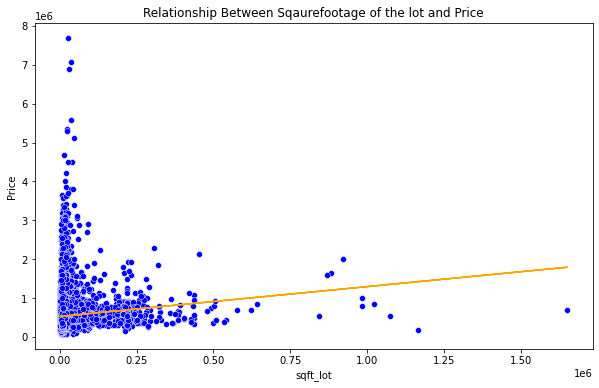

In [6]:
plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x="sqft_lot", y="price", data=df, color = 'blue')

ax.set(xlabel="sqft_lot", ylabel = "Price", title="Relationship Between Sqaurefootage of the lot and Price")


x=df["sqft_lot"]
y=df["price"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

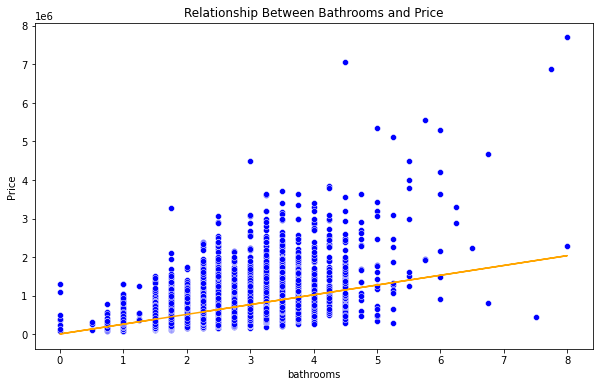

In [23]:
plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x="bathrooms", y="price", data=df, color = 'blue')

ax.set(xlabel="bathrooms", ylabel = "Price", title="Relationship Between Bathrooms and Price")


x=df["bathrooms"]
y=df["price"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

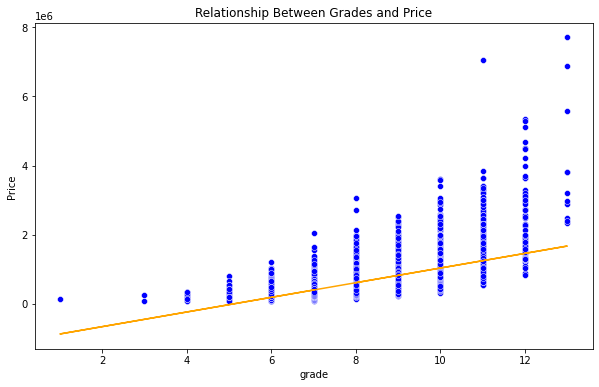

In [19]:
plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x="grade", y="price", data=df, color = 'blue')

ax.set(xlabel="grade", ylabel = "Price", title="Relationship Between Grades and Price")


x=df["grade"]
y=df["price"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

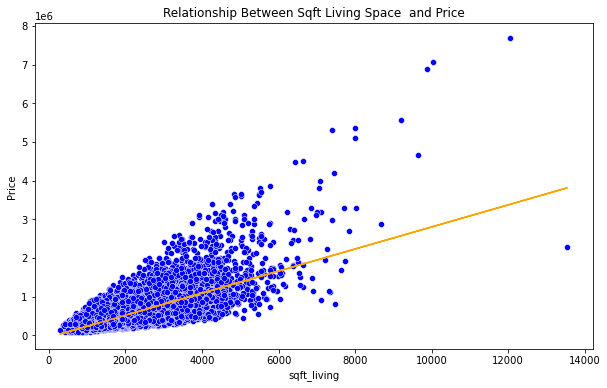

In [20]:
plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x="sqft_living", y="price", data=df, color = 'blue')

ax.set(xlabel="sqft_living", ylabel = "Price", title="Relationship Between Sqft Living Space  and Price")


x=df["sqft_living"]
y=df["price"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

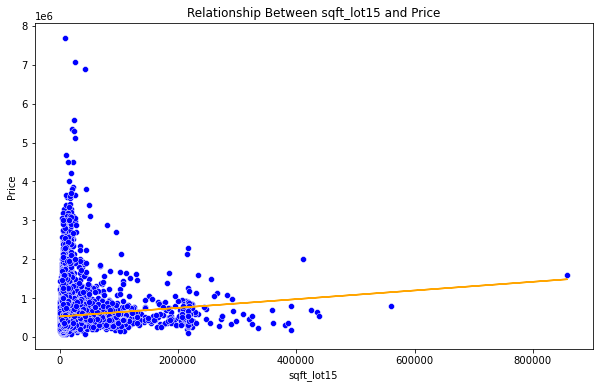

In [21]:
plt.subplots(figsize = (10,6))
ax = sns.scatterplot(x="sqft_lot15", y="price", data=df, color = 'blue')

ax.set(xlabel="sqft_lot15", ylabel = "Price", title="Relationship Between sqft_lot15 and Price")


x=df["sqft_lot15"]
y=df["price"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'orange')

In [22]:
df.loc[df.bedrooms > 8]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2356,2356,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
3425,3425,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
3680,3680,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
8207,8207,8823900290,20150317T000000,1400000.0,9,4.00,4620,5508,2.5,0,...,11,3870,750,1915,0,98105,47.6684,-122.309,2710,4320
8446,8446,8823901445,20150313T000000,934000.0,9,3.00,2820,4480,2.0,0,...,7,1880,940,1918,0,98105,47.6654,-122.307,2460,4400
8597,8597,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8624,8624,1997200215,20140507T000000,599999.0,9,4.50,3830,6988,2.5,0,...,7,2450,1380,1938,0,98103,47.6927,-122.338,1460,6291
11181,11181,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
14156,14156,2902200015,20150106T000000,700000.0,9,3.00,3680,4400,2.0,0,...,7,2830,850,1908,0,98102,47.6374,-122.324,1960,2450
17114,17114,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

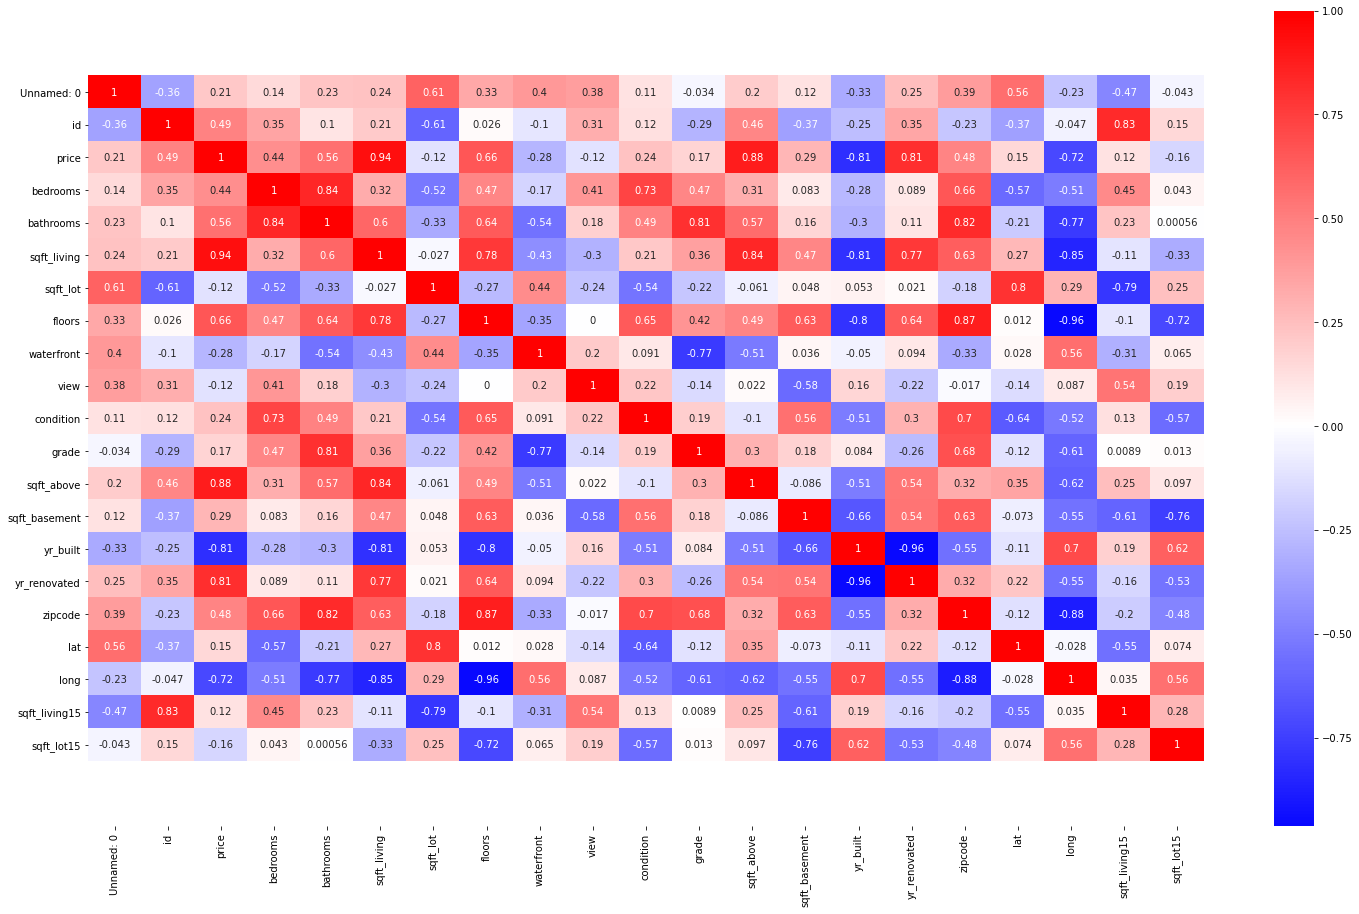

In [24]:
#create a heatmap to visualize the correlations
fig, ax = plt.subplots(figsize=(25,15)) # figsize to make larger
sns.heatmap(df.loc[df.price > 5000000].corr(), cmap='bwr', center=0, annot=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 2 
t -= 2 
plt.ylim(b, t) 
plt.show()

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [51]:
# your code here
bedrooms = pd.get_dummies(df['bedrooms'])

In [52]:
df = pd.concat([df,bedrooms],axis=1)

In [53]:
df.rename(columns={1:'bed1',2:'bed2',3:'bed3',4:'bed4',5:'bed5',6:'bed6',7:'bed7',8:'bed8',9:'bed9',10:'bed10'},inplace=True)

In [54]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,bed1,bed2,bed3,bed4,bed5,bed6,bed7,bed8,bed9,bed10,Nan
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,0,0,0,1,0,0,0,0,0,0,0
1,1,7974200820,20140821T000000,865000.0,5,3,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,0,0,0,0,1,0,0,0,0,0,0
2,2,7701450110,20140815T000000,1038000.0,4,2.5,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,0,0,0,1,0,0,0,0,0,0,0
3,3,9522300010,20150331T000000,1490000.0,3,3.5,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,0,0,1,0,0,0,0,0,0,0,0
4,4,9510861140,20140714T000000,711000.0,3,2.5,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,0,0,1,0,0,0,0,0,0,0,0


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [112]:
#your code here
df['years_old'] = 2020- pd.DatetimeIndex(df['yr_built']).year

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [113]:
df['new_home'] = np.where(df['yr_built']>=2013, 1, 0)

In [114]:
df['renovated_home'] = np.where(df['yr_renovated']>0, 1, 0)

In [58]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,bed1,bed2,bed3,bed4,bed5,bed6,bed7,bed8,bed9,bed10,Nan,years_old,new_home,renovated_home
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,0,0,0,1,0,0,0,0,0,0,0,34,0,0
1,1,7974200820,20140821T000000,865000.0,5,3,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,0,0,0,0,1,0,0,0,0,0,0,43,0,0
2,2,7701450110,20140815T000000,1038000.0,4,2.5,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,0,0,0,1,0,0,0,0,0,0,0,23,0,0
3,3,9522300010,20150331T000000,1490000.0,3,3.5,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,0,0,1,0,0,0,0,0,0,0,0,30,0,0
4,4,9510861140,20140714T000000,711000.0,3,2.5,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,0,0,1,0,0,0,0,0,0,0,0,16,0,0


# Name features and target variable

In [115]:
features = ['sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

In [116]:
df_features = df[features]

In [117]:
target1 = df['price']

In [118]:
target2 = df['log_price']

In [77]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)

,index,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,bed1,bed2,bed3,bed4,bed5,bed6,bed7,bed8,bed9,bed10,Nan,years_old,new_home,renovated_home
0,0.0,0.0,2.591820e+09,365000.0,4.0,2.25,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,12.807653,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0
1,1.0,1.0,7.974201e+09,865000.0,5.0,3.00,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,6283.0,13.670485,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0
2,2.0,2.0,7.701450e+09,1038000.0,4.0,2.50,3770.0,10893.0,2.0,0.0,2.0,3.0,11.0,3770.0,0.0,1997.0,0.0,98006.0,47.5646,-122.129,3710.0,9685.0,13.852806,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0
3,3.0,3.0,9.522300e+09,1490000.0,3.0,3.50,4560.0,14608.0,2.0,0.0,2.0,3.0,12.0,4560.0,0.0,1990.0,0.0,98034.0,47.6995,-122.228,4050.0,14226.0,14.214287,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0
4,4.0,4.0,9.510861e+09,711000.0,3.0,2.50,2550.0,5376.0,2.0,0.0,0.0,3.0,9.0,2550.0,0.0,2004.0,0.0,98052.0,47.6647,-122.083,2250.0,4050.0,13.474428,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285.0,17285.0,6.273002e+08,750000.0,5.0,2.50,3240.0,9960.0,1.0,0.0,1.0,3.0,8.0,2020.0,1220.0,1958.0,0.0,98008.0,47.5858,-122.112,2730.0,10400.0,13.527828,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0
17286,17286.0,17286.0,8.819900e+09,440000.0,2.0,1.75,1300.0,4000.0,2.0,0.0,0.0,3.0,7.0,1300.0,0.0,1948.0,0.0,98105.0,47.6687,-122.288,1350.0,4013.0,12.994530,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0
17287,17287.0,17287.0,3.816300e+09,310000.0,3.0,1.00,1050.0,9876.0,1.0,0.0,0.0,3.0,7.0,1050.0,0.0,1953.0,0.0,98028.0,47.7635,-122.262,1760.0,9403.0,12.644328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0
17288,17288.0,17288.0,1.220691e+08,427500.0,3.0,1.50,1900.0,43186.0,1.5,0.0,0.0,4.0,7.0,1300.0,600.0,1971.0,0.0,98038.0,47.4199,-121.990,2080.0,108028.0,12.965710,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0


In [119]:
#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target1)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target1))

1243879.757182647
[ 1.10333057e+02  1.28106558e-01  1.60535776e+04  6.07512097e+05
  5.56135383e+04  2.64901933e+04  1.01632182e+05  6.84432426e+01
  4.18898141e+01 -2.34485676e+03  2.44136347e+01 -5.44233500e+02
  6.08919174e+05 -2.21067007e+05  2.14832453e+01 -2.78143667e-01]
R^2:  0.6919132637317037


### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [120]:
# your code here
from sklearn.preprocessing import PolynomialFeatures
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2.head()

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,lat^2,lat long,lat sqft_living15,lat sqft_lot15,long^2,long sqft_living15,long sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2
0,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,4284900.0,18408510.0,4140.0,0.0,0.0,8280.0,16560.0,4284900.0,0.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,79085449.0,17786.0,0.0,0.0,35572.0,71144.0,18408510.0,0.0,17661498.0,0.0,8.720298e+08,421873.2484,-1086386.666,21254270.0,68476100.0,4.0,0.0,0.0,8.0,16.0,4140.0,0.0,3972.0,0.0,196116.0,94.8776,-244.324,4780.0,15400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.000,0.0,0.0,16.0,32.0,8280.0,0.0,7944.0,0.0,392232.0,189.7552,-488.648,9560.0,30800.0,64.0,16560.0,0.0,15888.0,0.0,784464.0,379.5104,-977.296,19120.0,61600.0,4284900.0,0.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,0.0,0.0,0.0,0.0,0.000,-0.00,0.0,0.0,3944196.0,0.0,194743188.0,94213.4568,-242613.732,4746540.0,15292200.0,0.0,0.0,0.0,-0.0,0.0,0.0,9.615371e+09,4.651754e+06,-1.197896e+07,234358620.0,7.550466e+08,2250.439745,-5795.218686,113378.732,365278.7600,14923.554244,-291967.18,-940647.400,5712100.0,18403000.0,59290000.0
1,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,6283.0,8410000.0,19517000.0,2900.0,0.0,0.0,14500.0,23200.0,5307000.0,3103000.0,5733300.0,0.0,284533500.0,138267.360,-354626.50,6873000.0,18220700.0,45292900.0,6730.0,0.0,0.0,33650.0,53840.0,12315900.0,7201100.0,13305210.0,0.0,6.603140e+08,320875.6

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [121]:
# your code here
poly = PolynomialFeatures(degree=2, include_bias=False)

In [122]:
poly_data = poly.fit_transform(df[features])


poly_columns = poly.get_feature_names(features)

df_poly = pd.DataFrame(poly_data, columns=poly_columns)

df_poly.head()

,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living view,sqft_living condition,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living yr_built,sqft_living yr_renovated,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot view,sqft_lot condition,sqft_lot grade,sqft_lot sqft_above,sqft_lot sqft_basement,sqft_lot yr_built,sqft_lot yr_renovated,sqft_lot zipcode,sqft_lot lat,sqft_lot long,sqft_lot sqft_living15,sqft_lot sqft_lot15,floors^2,floors waterfront,floors view,floors condition,floors grade,floors sqft_above,floors sqft_basement,floors yr_built,floors yr_renovated,floors zipcode,floors lat,floors long,floors sqft_living15,floors sqft_lot15,waterfront^2,waterfront view,waterfront condition,waterfront grade,waterfront sqft_above,waterfront sqft_basement,waterfront yr_built,waterfront yr_renovated,waterfront zipcode,waterfront lat,waterfront long,waterfront sqft_living15,waterfront sqft_lot15,view^2,view condition,view grade,view sqft_above,view sqft_basement,view yr_built,view yr_renovated,view zipcode,view lat,view long,view sqft_living15,view sqft_lot15,condition^2,condition grade,condition sqft_above,condition sqft_basement,condition yr_built,condition yr_renovated,condition zipcode,condition lat,condition long,condition sqft_living15,condition sqft_lot15,grade^2,grade sqft_above,grade sqft_basement,grade yr_built,grade yr_renovated,grade zipcode,grade lat,grade long,grade sqft_living15,grade sqft_lot15,sqft_above^2,sqft_above sqft_basement,sqft_above yr_built,sqft_above yr_renovated,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above sqft_living15,sqft_above sqft_lot15,sqft_basement^2,sqft_basement yr_built,sqft_basement yr_renovated,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement sqft_living15,sqft_basement sqft_lot15,yr_built^2,yr_built yr_renovated,yr_built zipcode,yr_built lat,yr_built long,yr_built sqft_living15,yr_built sqft_lot15,yr_renovated^2,yr_renovated zipcode,yr_renovated lat,yr_renovated long,yr_renovated sqft_living15,yr_renovated sqft_lot15,zipcode^2,zipcode lat,zipcode long,zipcode sqft_living15,zipcode sqft_lot15,lat^2,lat long,lat sqft_living15,lat sqft_lot15,long^2,long sqft_living15,long sqft_lot15,sqft_living15^2,sqft_living15 sqft_lot15,sqft_lot15^2
0,2070.0,8893.0,2.0,0.0,0.0,4.0,8.0,2070.0,0.0,1986.0,0.0,98058.0,47.4388,-122.162,2390.0,7700.0,4284900.0,18408510.0,4140.0,0.0,0.0,8280.0,16560.0,4284900.0,0.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,79085449.0,17786.0,0.0,0.0,35572.0,71144.0,18408510.0,0.0,17661498.0,0.0,8.720298e+08,421873.2484,-1086386.666,21254270.0,68476100.0,4.0,0.0,0.0,8.0,16.0,4140.0,0.0,3972.0,0.0,196116.0,94.8776,-244.324,4780.0,15400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.000,0.0,0.0,16.0,32.0,8280.0,0.0,7944.0,0.0,392232.0,189.7552,-488.648,9560.0,30800.0,64.0,16560.0,0.0,15888.0,0.0,784464.0,379.5104,-977.296,19120.0,61600.0,4284900.0,0.0,4111020.0,0.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,0.0,0.0,0.0,0.0,0.000,-0.00,0.0,0.0,3944196.0,0.0,194743188.0,94213.4568,-242613.732,4746540.0,15292200.0,0.0,0.0,0.0,-0.0,0.0,0.0,9.615371e+09,4.651754e+06,-1.197896e+07,234358620.0,7.550466e+08,2250.439745,-5795.218686,113378.732,365278.7600,14923.554244,-291967.18,-940647.400,5712100.0,18403000.0,59290000.0
1,2900.0,6730.0,1.0,0.0,0.0,5.0,8.0,1830.0,1070.0,1977.0,0.0,98115.0,47.6784,-122.285,2370.0,6283.0,8410000.0,19517000.0,2900.0,0.0,0.0,14500.0,23200.0,5307000.0,3103000.0,5733300.0,0.0,284533500.0,138267.360,-354626.50,6873000.0,18220700.0,45292900.0,6730.0,0.0,0.0,33650.0,53840.0,12315900.0,7201100.0,13305210.0,0.0,6.603140e+08,320875.6

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [123]:
#your code here 

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly, target1, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 152) Target:  (13832,)
Training set - Features:  (3458, 152) Target:  (3458,)


### 5.2) Fit your scaler to training the data.

In [128]:
#your code here 
scaler = StandardScaler()


#fit and transform the training data
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=df_poly.columns)
#transform the testing dat
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_poly.columns)

In [125]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 153155.36220663635


In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


[variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
vif["features"] = df[features].columns
vif.round(1)

,VIF Factor,features
0,inf,sqft_living
1,2.3,sqft_lot
2,15.6,floors
3,1.2,waterfront
4,1.5,view
5,34.2,condition
6,145.0,grade
7,inf,sqft_above
8,inf,sqft_basement
9,8352.4,yr_built


In [129]:
vif.sort_values(by='VIF Factor', ascending=False)

,VIF Factor,features
0,inf,sqft_living
7,inf,sqft_above
8,inf,sqft_basement
11,1.609834e+06,zipcode
13,1.344533e+06,long
12,1.387863e+05,lat
9,8.352356e+03,yr_built
6,1.449735e+02,grade
5,3.418810e+01,condition
14,2.714996e+01,sqft_living15


### 5.4) Fit the model to the training data.

In [4]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/